In [1]:
import os
import pandas as pd, numpy as np
os.chdir('C:\\Users\\ABC\\6. Datasets')
os.listdir()
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
df = pd.read_csv('student.csv')
le = LabelEncoder()
lr = LogisticRegression()
import time

In [2]:
mm = MinMaxScaler()

In [4]:
df = pd.read_csv('student.csv')
df['math score'] = mm.fit_transform(df[['math score']])

In [5]:
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df['gender'] = le.fit_transform(df['gender'])
col_scale = ['math score', 'reading score','writing score']
df[col_scale] = mm.fit_transform(df[col_scale])

In [6]:
x = df.iloc[:, 1:]
y = (df['gender'])

In [7]:
x

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,3,4,1,0,0.517647,0.600000,0.741176
1,3,0,1,1,0.952941,0.906667,0.847059
2,3,4,0,1,0.494118,0.680000,0.729412
3,1,4,0,1,0.647059,0.600000,0.564706
4,3,0,1,1,0.800000,0.800000,0.835294
...,...,...,...,...,...,...,...
995,2,4,1,1,0.729412,0.693333,0.658824
996,2,4,1,1,0.764706,0.546667,0.600000
997,0,2,1,0,0.611765,0.813333,0.835294
998,4,2,1,1,0.764706,0.626667,0.552941


In [8]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [9]:
print('Time at Start:', time.strftime("%H:%M:%S"))
start_time = time.time()
for i in range(270, 350): 
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    cvv = cross_val_score(lr, x_train, y_train, cv = 5, scoring='accuracy')
    model = lr.fit(x_train, y_train)
    y_predict = lr.predict(x_test)
    #cc = confusion_matrix(y_test, y_predict)
    ac = accuracy_score(y_test, y_predict)
    if cvv.mean() > 0.887 and ac > 0.9:
        print('A', i, cvv.mean(), ac) 
    elif ac > 0.9:
        print('B', i, cvv.mean(), ac) 
end_time = time.time() 
time_elapsed = end_time - start_time
print('Time at End:', time.strftime("%H:%M:%S"))
print('Time Elapsed:', time_elapsed)


Time at Start: 08:52:54
B 275 0.8612500000000001 0.905
B 284 0.8600000000000001 0.915
B 286 0.8674999999999999 0.905
B 288 0.865 0.91
B 298 0.8724999999999999 0.92
B 304 0.8474999999999999 0.915
B 320 0.86 0.915
Time at End: 08:53:09
Time Elapsed: 14.839481592178345


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=298)
model = lr.fit(x_train, y_train)
y_predict = model.predict(x_test)
ac = accuracy_score(y_test, y_predict)
ac
probabilities = model.predict_proba(x_test)[:, 1]

result = pd.DataFrame({'y test': y_test, 'y_predict': y_predict, 'prob': probabilities})
result['Boolean'] = result['y test'] == result['y_predict']
result['Diff From Mean'] = result['prob'] - 0.5
pd.set_option('display.max_rows', None)
result.sort_values(by='Boolean')

,y test,y_predict,prob,Boolean,Diff From Mean
874,0,1,0.542662,False,0.042662
457,0,1,0.623018,False,0.123018
741,1,0,0.454252,False,-0.045748
291,0,1,0.529712,False,0.029712
147,0,1,0.609484,False,0.109484
121,1,0,0.437525,False,-0.062475
655,1,0,0.412252,False,-0.087748
513,0,1,0.652295,False,0.152295
784,0,1,0.558554,False,0.058554
669,1,0,0.475875,False,-0.024125


In [11]:
model.predict_proba(x_test)[:]

array([[0.20746059, 0.79253941],
       [0.57572159, 0.42427841],
       [0.15553703, 0.84446297],
       [0.8179739 , 0.1820261 ],
       [0.83787475, 0.16212525],
       [0.61745094, 0.38254906],
       [0.46219506, 0.53780494],
       [0.73876611, 0.26123389],
       [0.67840938, 0.32159062],
       [0.3467185 , 0.6532815 ],
       [0.66080711, 0.33919289],
       [0.19140537, 0.80859463],
       [0.25223884, 0.74776116],
       [0.84291315, 0.15708685],
       [0.83914556, 0.16085444],
       [0.49707446, 0.50292554],
       [0.23700116, 0.76299884],
       [0.83936534, 0.16063466],
       [0.33535593, 0.66464407],
       [0.37522184, 0.62477816],
       [0.26422507, 0.73577493],
       [0.52412456, 0.47587544],
       [0.57872211, 0.42127789],
       [0.87525778, 0.12474222],
       [0.72178273, 0.27821727],
       [0.41364817, 0.58635183],
       [0.25871779, 0.74128221],
       [0.57354107, 0.42645893],
       [0.73471177, 0.26528823],
       [0.19167941, 0.80832059],
       [0.

In [12]:
result.columns

Index(['y test', 'y_predict', 'prob', 'Boolean', 'Diff From Mean'], dtype='object')

In [13]:
#223 is gooood 

In [14]:
time.strftime("%H:%M:%S")

'08:53:16'

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,0.517647,0.600000,0.741176
1,1,3,0,1,1,0.952941,0.906667,0.847059
2,0,3,4,0,1,0.494118,0.680000,0.729412
3,1,1,4,0,1,0.647059,0.600000,0.564706
4,0,3,0,1,1,0.800000,0.800000,0.835294


<AxesSubplot:>

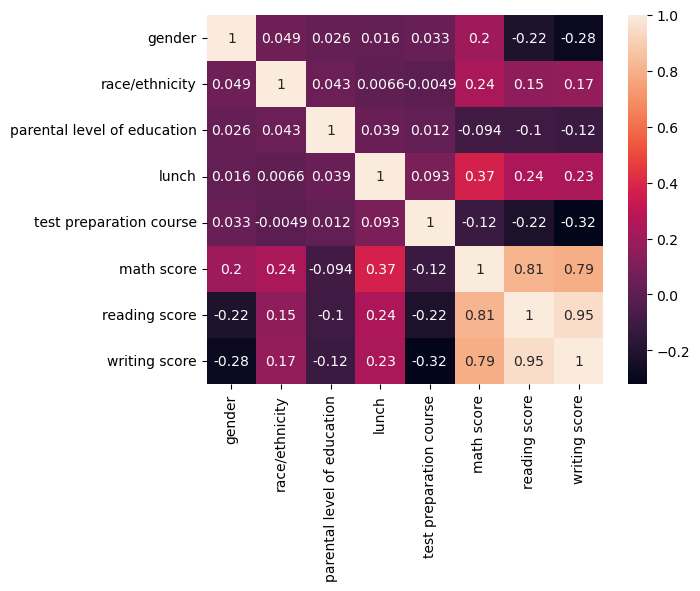

In [16]:
sns.heatmap(df.corr(), annot = True)